In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
%matplotlib inline

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

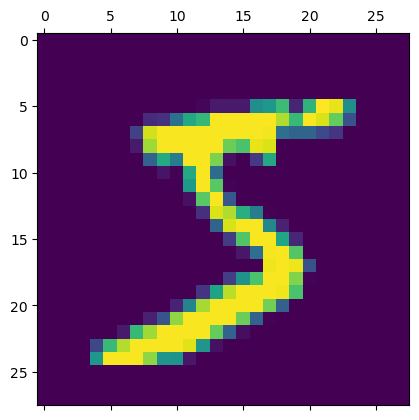

In [3]:
plt.matshow(x_train[0])

In [4]:
x_train = x_train / 255
x_test = x_test / 255

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [6]:
model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [7]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 15s 6ms/step - loss: 0.6460 - accuracy: 0.8393 - val_loss: 0.3585 - val_accuracy: 0.9039
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3422 - accuracy: 0.9052 - val_loss: 0.2995 - val_accuracy: 0.9154
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2953 - accuracy: 0.9173 - val_loss: 0.2673 - val_accuracy: 0.9253
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2654 - accuracy: 0.9256 - val_loss: 0.2452 - val_accuracy: 0.9315
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2420 - accuracy: 0.9321 - val_loss: 0.2293 - val_accuracy: 0.9334
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2228 - accuracy: 0.9373 - val_loss: 0.2123 - val_accuracy: 0.9390
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2065 - accuracy: 0.9424 - val_loss: 0.1965 - val_accur

In [8]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1658 - accuracy: 0.9526
Loss = 0.166
Accuracy = 0.953


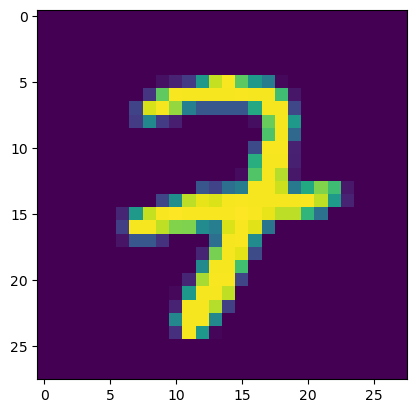

In [9]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [10]:
test_predict = model.predict(x_test)
#get classification labels
test_predict_labels = np.argmax(test_predict,axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = test_predict_labels)
print('Confusion Matrix of the Test Set :\n' , confusion_matrix)

313/313 [==============================] - 1s 3ms/step
Confusion Matrix of the Test Set :
 tf.Tensor(
[[ 964    0    1    2    0    4    5    2    2    0]
 [   0 1118    2    2    0    1    3    2    7    0]
 [   8    2  974   13    7    1    6    9   10    2]
 [   1    0    8  958    1   16    0   12   11    3]
 [   1    1    4    1  933    1   11    2    5   23]
 [   8    1    1   17    3  835   11    1   10    5]
 [  10    3    3    0    7   10  920    2    3    0]
 [   2    7   20    8    2    1    0  975    1   12]
 [   5    3    2   14    6   10    8    8  911    7]
 [  11    7    1   12   22    4    1    8    5  938]], shape=(10, 10), dtype=int32)
